STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS

importing machine learning libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

C:\Users\anubh\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


This code imports the necessary libraries and modules for training a recurrent neural network to predict stock prices.  - `numpy` is imported with the alias `np`, which provides support for efficient numerical operations. - `pandas` is imported with the alias `pd`, which provides helpful data manipulation and analysis tools. - `NaiveBayesClassifier` is imported from `nltk.classify`, which is part of the Natural Language Toolkit (NLTK) library. This classifier will be used for sentiment analysis. - `subjectivity` is imported from `nltk.corpus`, which provides a dataset for training the sentiment analyzer. - `SentimentAnalyzer` is imported from `nltk.sentiment`, which provides an interface to analyze the sentiment of text using different classifiers. - `util` is imported from `nltk.sentiment.util`, which provides utility functions for sentiment analysis. - `matplotlib.pyplot` is imported with the alias `mlpt`, which is a popular library
for creating static, animated, and interactive visualizations in Python. It will be used for plotting the results.  No specific code is shown, but based on the imported modules, it can be inferred that the code will involve using a recurrent neural network for stock price prediction, accompanied by sentiment analysis using the Naive Bayes classifier from the NLTK library. Additionally, matplotlib.pyplot will be used to visualize the results.

importing library to fetch data from twitter

In [2]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

This code is importing various libraries such as tweepy, csv, and pandas. These libraries are commonly used for data manipulation, analysis, and interaction with APIs.  After importing these libraries, the code generates random numbers using the "random" library. The "numpy" library is then imported to perform mathematical operations on these randomly generated numbers.  Finally, the "pandas" library is imported again, this time with an alias "pd". This alias is commonly used for convenience when working with the pandas library, as it provides a shorter and more readable way to refer to its functions and objects.

setting up consumer key and access token

In [3]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

This code sets up the authentication for accessing the Twitter API using the Tweepy library. It includes the consumer key, consumer secret, access token, and access token secret, which are all required to authenticate and access the Twitter API. Once the authentication is set up, the code creates an API object that can be used to interact with the Twitter API, with the option to wait on rate limits.

Fetching tweets for United Airlines in extended mode (means entire tweet will come and not just few words + link)

In [4]:
fetch_tweets=tweepy.Cursor(api.search, q="#unitedAIRLINES",count=100, lang ="en",since="2018-9-13", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

This code fetches tweets from the Twitter API based on a specific search query (#unitedAIRLINES). It retrieves a maximum of 100 tweets in English language posted since September 13, 2018. The tweets are fetched with additional information such as the creation date and the full text of the tweet.  The fetched tweet information is then stored in a Pandas DataFrame called "data". The DataFrame has two columns: "Date" for the tweet creation date and "Tweets" for the full text of the tweet. Each row of the DataFrame represents a single tweet.

Removing special character from each tweets

In [297]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.set_value(index,'Date',row["Date"])
    cdata.set_value(index,'Tweets',my_new_string)
    index=index+1
#print(cdata.dtypes)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


This code snippet is responsible for cleaning and transforming data from a DataFrame called `data` into a new DataFrame called `cdata`.   Here's a breakdown of what the code does:  1. `data.to_csv("Tweets.csv")`: This line of code exports the original DataFrame `data` to a CSV file called "Tweets.csv". It saves the contents of the DataFrame to a file for future use.  2. Creation of the `cdata` DataFrame: It initializes an empty DataFrame with two columns: 'Date' and 'Tweets'. This DataFrame is used to store the cleaned and transformed data.  3. Setting up variables and a loop: It sets up variables `total` and `index` with initial values. Then, it enters a loop where it iterates over each row of the `data` DataFrame.  4. Cleaning the Tweets: It retrieves the value of the "Tweets" column from the current row and assigns it to the `stre` variable. It removes any characters that are not letters, numbers, or spaces from `stre` using regex. The cleaned string is then stored in the `my_new_string` variable.  5. Sorting the `cdata` DataFrame: It sorts the index of `cdata` based on the default sorting algorithm. However, since the sorted DataFrame is not assigned to any variable, this sorting operation does not have any practical effect.  6. Setting values in the `cdata` DataFrame: It sets the "Date" and "Tweets" values of the current index in the `cdata` DataFrame using the `set_value()` method.  7. Incrementing the index: It increments the `index` variable by 1.  8. Commented-out print statement: It contains a commented-out line of code that prints the data types of the `cdata` DataFrame columns.  Overall, this code takes the original data, cleans the "Tweets" column by removing unwanted characters, and stores the cleaned data in a new DataFrame called `cdata`.

Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [6]:
cdata

Date                                             Tweets
0    2018-11-28  We are already over 2 hours late for departure...
1    2018-11-28  Oh there aint no rest for the wicked Taking of...
2    2018-11-28  765 amp up  United Airlines Flights to Tahiti ...
3    2018-11-28  RT Wcash108 united two pots of gold on a Unite...
4    2018-11-27  RT HChan03 My photo of the day My flight to Lo...
5    2018-11-27  My photo of the day My flight to Los Angeles C...
6    2018-11-27  Learn a thing or two about how incredible huma...
7    2018-11-27  I feel so disrespected by United airlines empl...
8    2018-11-27  Good Morningunitedairlines GeminiJets  united ...
9    2018-11-27  NotTheBestPicture but it was an AwesomeSurpris...
10   2018-11-27  Now my rebooked flight is delayed because you ...
11   2018-11-27  Dear united airlines you have some pretty dece...
12   2018-11-27  unitedairlines needs to up their charging game...
13   2018-11-27  Ahh My lawnmower with Jet Engines Off again an...
14   2018-11-27  OC bound unitedairlines united flythefriendlys...
15   2018-11-27  Another flight to the BayIm starting to feel s...
16   2018-11-27  united it will be warmer in Chicago today than...
17   2018-11-27  Inc Or UnitedAirlines selling cheap tickets on...
18   2018-11-27  united I was in the hospital and had to cancel...
19   2018-11-27   Fisher House  UnitedAirlines  UnitedCharityMi...
20   2018-11-27  Ive never waited so long to leave an airport h...
21   2018-11-27  Stay away from UnitedAirlines and especially t...
22   2018-11-27  KristelCLE united Probably because you are a V...
23   2018-11-27  Unitedairliness best compensation to a 3 day d...
24   2018-11-27  Making the most of a 3 hour delay unitedairlin...
25   2018-11-27  UnitedAirlines  Thanks again UnitedAirlines yo...
26   2018-11-27  united UA257 10hr delay But not cancelled Ridi...
27   2018-11-27  Please  Dont book your flight with UnitedAirli...
28   2018-11-27  havenicetuesday opendaygoodmorning relaxing un...
29   2018-11-27  Hey UnitedAirlines its not my fault that you c...
..          ...                                                ...
469  2018-11-18  Still waiting on my bagThe worst experience Un...
470  2018-11-18  2 flights 2 issues never flying Unitedairlines...
471  2018-11-17  unitedAIRLINES stop blaming snow in denver The...
472  2018-11-17  united unitedAIRLINES  and the saga continues ...
473  2018-11-17   unitedAIRLINES todays crap in denver is bullshit
474  2018-11-17  All unitedairlines flights grounded to Denver ...
475  2018-11-17  I just did and was told that my bag and those ...
476  2018-11-17  Another TDY misadventure courtesy of UnitedAir...
477  2018-11-17  Our bag arrived At least it got here before we...
478  2018-11-17  Homeboy on unitedairlines literally brought a ...
479  2018-11-17  worst travel experience I had with UnitedAirli...
480  2018-11-17  Why does my flight never leave on time or arri...
481  2018-11-17  Hey unitedwhat is the point of having my known...
482  2018-11-17  Calling all travel agents  Win with United Air...
483  2018-11-17  Shrinking Delta American and UnitedAirlines ar...
484  2018-11-17  On my way home  thank you united unitedairline...
485  2018-11-17  Wow unitedAIRLINES Providing the absolute wors...
486  2018-11-17  Perhaps we should just open the door and pee i...
487  2018-11-17  Was Uniteds new Polaris Business Class more hy...
488  2018-11-17  UnitedAirlines Just landed on flight 916 AKLSF...
489  2018-11-17  Riggssherri JNadar3 Youre welcome to use my tw...
490  2018-11-17  breakfast quiche on unitedairlines  fantastic ...
491  2018-11-17  united Want to find my bags now I sent you con...
492  2018-11-17  united Worst flight I have ever taken and I ha...
493  2018-11-17  Houston at a glance unitedairlines houston tex...
494  2018-11-17  united unitedAIRLINES saga with pilgrims conti...
495  2018-11-17  RT JNadar3 Currently having a terrible experie...
496  2018-11-17  Cancelled flight reschedule cancelled fli

From the given information, it is difficult to understand what exactly is represented by "cdata". However, assuming it represents a variable or object, the code is likely performing some operations related to the prediction of stock prices using a recurrent neural network (RNN).  RNNs are a type of neural network that are well-suited for sequential data analysis. In the context of stock price prediction, the RNN model is likely trained on historical stock price data to forecast future price values.  The code snippet you provided could be a part of the data processing pipeline or the model training process. It might involve loading or preprocessing the input data, which could include features such as previous stock prices, financial indicators, or other relevant information. These steps are essential before feeding the data into the RNN model.  It is important to note that without the complete code and a description of other related components, it is challenging to provide a more precise explanation.

Creating a dataframe where we will combine the tweets date wise and store into

In [7]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

This code initializes an empty Pandas DataFrame called `ccdata`, which has two columns named 'Date' and 'Tweets'. This DataFrame is likely intended to store data related to stock prices and tweet information for further analysis and prediction using a recurrent neural network.

In [8]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'Date',get_date)
        ccdata.set_value(indx,'Tweets',get_tweet)
        indx=indx+1
        get_tweet=" "

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


This code is a part of a program that predicts stock prices using a recurrent neural network.   The code initializes the variable "indx" to 0 and "get_tweet" to an empty string. It then iterates over the range from 0 to the length of the "cdata" object (presumably a data frame) minus 1.  Within each iteration, it retrieves the date value from the "Date" column of the "cdata" object at the current index and the next index. If the dates are the same, it appends the tweet value from the "Tweets" column of the "cdata" object at the current index to the "get_tweet" string.   If the dates are different, it updates an external object called "ccdata" at the index "indx" by setting the "Date" value to the current date and the "Tweets" value to the accumulated tweets in "get_tweet". It then increments the "indx" variable, resets "get_tweet" to an empty string, and continues to the next iteration.  This code appears to be collecting all the tweets from a particular date and storing them in a separate object ("ccdata") with the corresponding date. The purpose of this code is likely to aggregate tweets by date, possibly as input for the stock price prediction model.

All the tweets has been clubbed as per their date.

In [9]:
ccdata

Date                                             Tweets
0   2018-11-28  We are already over 2 hours late for departure...
1   2018-11-27   RT HChan03 My photo of the day My flight to L...
2   2018-11-26   unitedairlines Stuck on UA2200 at gate lettin...
3   2018-11-25   Fullservice flights to New York from 926 retu...
4   2018-11-24   decades and I am hoping to continue that rela...
5   2018-11-23   RT AngeliqueK Is anyone satisfied with flying...
6   2018-11-22   RT UnitedFlyerHD Beautiful view of Chicago at...
7   2018-11-21   Instead of Turkey I am eating pasta for thank...
8   2018-11-20   united 150 for unaccompanied minor service yo...
9   2018-11-19   united Thank you for damaging and taking my n...
10  2018-11-18   unitedairlines operations team very inconside...

Based on the given information, it appears that "ccdata" is a reference to a variable or an object in the code. Without further details or the code snippet itself, it is not possible to provide a specific explanation of what this code does with the "ccdata" variable.  However, in a general context of predicting stock prices using recurrent neural networks, the "ccdata" variable could potentially represent the historical stock price data and related information. This data is commonly used as input to train and build a recurrent neural network model. The model would then analyze patterns and relationships within the historical stock price data to make predictions on future stock prices.

Now to know the "closing price" of each day we will import STOCK PRICE DATA for UNITED AIRLINES from "yahoo.finance". We will consider "Close" price only.

In [10]:
read_stock_p=pd.read_csv('UAL.csv')
read_stock_p

Date       Open       High        Low      Close  Adj Close  \
0    2017-11-15  56.990002  57.689999  56.509998  57.490002  57.490002   
1    2017-11-16  58.070000  58.759998  57.590000  58.680000  58.680000   
2    2017-11-17  58.410000  58.590000  57.799999  58.200001  58.200001   
3    2017-11-20  58.259998  58.830002  57.820000  58.759998  58.759998   
4    2017-11-21  58.860001  59.770000  58.779999  59.709999  59.709999   
5    2017-11-22  59.389999  60.000000  59.270000  59.689999  59.689999   
6    2017-11-24  59.619999  59.750000  59.250000  59.430000  59.430000   
7    2017-11-27  59.439999  59.540001  58.930000  59.090000  59.090000   
8    2017-11-28  59.160000  60.380001  59.000000  60.189999  60.189999   
9    2017-11-29  60.599998  62.290001  60.389999  62.090000  62.090000   
10   2017-11-30  62.250000  63.840000  62.080002  63.320000  63.320000   
11   2017-12-01  63.200001  63.490002  61.840000  62.570000  62.570000   
12   2017-12-04  63.689999  64.330002  62.549999  62.590000  62.590000   
13   2017-12-05  62.590000  62.720001  61.840000  62.200001  62.200001   
14   2017-12-06  62.160000  62.599998  61.779999  62.189999  62.189999   
15   2017-12-07  62.279999  63.779999  61.840000  63.529999  63.529999   
16   2017-12-08  65.230003  65.290001  63.380001  63.549999  63.549999   
17   2017-12-11  63.689999  64.690002  63.480000  64.239998  64.239998   
18   2017-12-12  64.449997  64.519997  63.360001  63.360001  63.360001   
19   2017-12-13  63.520000  63.740002  62.450001  63.029999  63.029999   
20   2017-12-14  63.500000  64.040001  62.709999  63.130001  63.130001   
21   2017-12-15  63.619999  64.470001  63.259998  63.759998  63.759998   
22   2017-12-18  64.120003  64.760002  63.709999  64.559998  64.559998   
23   2017-12-19  64.830002  64.989998  64.330002  64.430000  64.430000   
24   2017-12-20  65.330002  66.269997  65.040001  65.900002  65.900002   
25   2017-12-21  66.169998  67.629997  66.150002  67.279999  67.279999   
26   2017-12-22  67.440002  67.480003  67.110001  67.250000  67.250000   
27   2017-12-26  66.940002  67.720001  66.480003  67.349998  67.349998   
28   2017-12-27  67.620003  67.620003  66.610001  67.120003  67.120003   
29   2017-12-28  67.120003  67.570000  66.879997  67.540001  67.540001   
..          ...        ...        ...        ...        ...        ...   
229  2018-10-15  80.400002  81.949997  80.099998  81.339996  81.339996   
230  2018-10-16  81.599998  84.209999  81.230003  83.519997  83.519997   
231  2018-10-17  88.019997  89.480003  86.160004  88.489998  88.489998   
232  2018-10-18  89.000000  89.610001  86.519997  87.089996  87.089996   
233  2018-10-19  87.260002  88.830002  87.019997  87.430000  87.430000   
234  2018-10-22  87.839996  89.230003  87.339996  88.610001  88.610001   
235  2018-10-23  87.019997  87.610001  84.440002  86.330002  86.330002   
236  2018-10-24  86.070000  86.709999  81.919998  82.190002  82.190002   
237  2018-10-25  82.690002  86.269997  82.480003  85.599998  85.599998   
238  2018-10-26  84.099998  85.580002  82.839996  84.629997  84.629997   
239  2018-10-29  85.980003  86.949997  83.919998  84.989998  84.989998   
240  2018-10-30  84.379997  86.250000  84.379997  85.849998  85.849998   
241  2018-10-31  87.250000  87.699997  85.370003  85.510002  85.510002   
242  2018-11-01  85.620003  88.470001  85.620003  88.040001  88.040001   
243  2018-11-02  88.470001  90.279999  88.010002  88.680000  88.680000   
244  2018-11-05  88.980003  89.820000  88.279999  89.470001  89.470001   
245  2018-11-06  90.000000  90.250000  88.830002  89.639999  89.639999   
246  2018-11-07  90.220001  92.330002  89.650002  92.160004  92.160004   
247  2018-11-08  92.089996  92.849998  91.529999  92.559998  92.559998   
248  2018-11-09  92.410004  93.599998  91.739998  92.349998  92.349998   
249  2018-11-12  92.360001  92.690002  91.029999  91.199997  91.199997   
250  2018-11-13  91.629997  93.379997  91.629997  92.599998  92.599998   
251  2018-11-14

This code reads the stock price data from a CSV file named 'UAL.csv' and stores it in a pandas DataFrame object called 'read_stock_p'. The CSV file is expected to contain columns for different attributes of the stock price data, such as date, open price, high price, low price, close price, and volume.

Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [11]:
ccdata['Prices']=""

This code line is assigning an empty string to the 'Prices' column of a variable called 'ccdata'. It seems like 'ccdata' is a dataframe or a similar data structure used to store information related to stock prices. This line of code might be initializing the 'Prices' column to be filled with stock price data in future computations or data manipulation steps.

In [12]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


This code is used to match the dates of tweets and stock price data in order to predict stock prices using a recurrent neural network.   Here's an explanation of the code:  1. The variable "indx" is initialized to 0. 2. A nested for loop is used to iterate over the indexes of both the ccdata (tweet data) and read_stock_p (stock price data) arrays. 3. Within the loop, the "get_tweet_date" variable is assigned the value of the date from the "ccdata" array at index "i", and "get_stock_date" variable is assigned the value of the date from the "read_stock_p" array at index "j". 4. The code then checks if the string representation of "get_stock_date" is equal to the string representation of "get_tweet_date". 5. If the dates match, the code sets the value of the "Prices" column in the "ccdata" array at index "i" to the integer value of the "Close" column in the "read_stock_p" array at index "j". 6. Once a match is found, the "break" statement is used to exit the inner loop and continue to the next iteration of the outer loop.

Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [13]:
ccdata

Date                                             Tweets Prices
0   2018-11-28  We are already over 2 hours late for departure...       
1   2018-11-27   RT HChan03 My photo of the day My flight to L...       
2   2018-11-26   unitedairlines Stuck on UA2200 at gate lettin...     91
3   2018-11-25   Fullservice flights to New York from 926 retu...       
4   2018-11-24   decades and I am hoping to continue that rela...       
5   2018-11-23   RT AngeliqueK Is anyone satisfied with flying...     94
6   2018-11-22   RT UnitedFlyerHD Beautiful view of Chicago at...       
7   2018-11-21   Instead of Turkey I am eating pasta for thank...     92
8   2018-11-20   united 150 for unaccompanied minor service yo...     91
9   2018-11-19   united Thank you for damaging and taking my n...     92
10  2018-11-18   unitedairlines operations team very inconside...

The "ccdata" in this context is likely referring to the stock market data, specifically the closing prices of a particular stock. The code is possibly used to retrieve and manipulate this data in order to train a recurrent neural network (RNN) to predict future stock prices.  The "cc" in "ccdata" could stand for "close" or "closing," as it is common to refer to the closing prices of stocks when analyzing their trends and making predictions.  Overall, the code may include functions to fetch the historical closing prices for a specific stock, preprocess the data by normalizing or scaling it, splitting the data into training
and testing sets, and possibly performing other relevant data manipulations required for training an RNN.

So we take the mean for the close price and put it in the blank value

In [14]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

This code calculates the mean of stock prices in a dataset and fills in missing values with the calculated mean.   First, it initializes variables `mean`, `summ`, and `count` to zero.   Then, in the first `for` loop, it iterates over the range of indices of the dataset `ccdata`.   Inside the first loop, it checks if the price value at the current index (`ccdata.Prices.iloc[i]`) is not an empty string. If it's not empty, it converts the value to an integer and adds it to the `summ` variable. It also increments the `count` variable by 1.   After the first loop, the mean is calculated by dividing the sum of prices (`summ`) by the count.   In the second `for` loop, it again iterates over the range of indices of the dataset.   Inside the second loop, it checks if the price value at the current index is an empty string. If it is, it assigns the mean value (converted to an integer) to the price value at that index in the `ccdata.Prices` column.   This process effectively replaces any missing values in the dataset with the calculated mean value.

Now all the entries have some value

In [15]:
ccdata

Date                                             Tweets  Prices
0   2018-11-28  We are already over 2 hours late for departure...      92
1   2018-11-27   RT HChan03 My photo of the day My flight to L...      92
2   2018-11-26   unitedairlines Stuck on UA2200 at gate lettin...      91
3   2018-11-25   Fullservice flights to New York from 926 retu...      92
4   2018-11-24   decades and I am hoping to continue that rela...      92
5   2018-11-23   RT AngeliqueK Is anyone satisfied with flying...      94
6   2018-11-22   RT UnitedFlyerHD Beautiful view of Chicago at...      92
7   2018-11-21   Instead of Turkey I am eating pasta for thank...      92
8   2018-11-20   united 150 for unaccompanied minor service yo...      91
9   2018-11-19   united Thank you for damaging and taking my n...      92
10  2018-11-18   unitedairlines operations team very inconside...      92

The "ccdata" variable likely represents the dataset or data structure containing the historical stock prices or other related financial data. This data is typically used for training a recurrent neural network (RNN) model to predict future stock prices.  The code you mentioned is part of a larger program that utilizes an RNN model. However, without the specific code snippet, it is difficult to provide a detailed explanation of what this code does. Typically, in an RNN, the historical stock price data is used to train the model to learn patterns and relationships in the data. Then, the trained model can be used to make predictions about future stock prices based on the patterns it has learned.  This code could involve steps such as data preprocessing, scaling or normalization of the data, splitting the data into training and testing sets, or any other task related to preparing the data for the RNN model.  Furthermore, the code might also include additional functionality, such as feature engineering (creating additional input variables from the existing data),
adjusting the model's hyperparameters (e.g., number of hidden layers, number of units per layer, learning rate), training the model using the training data, evaluating the model's performance using the testing data, and using the trained model to make predictions.  In summary, the code likely handles the data preparation and preprocessing steps required to train an RNN model for predicting stock prices using the provided dataset "ccdata".

Making "prices" column as integer so mathematical operations could be performed easily.

In [16]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

This code is assigning the integer representation of the 'Prices' column in the ccdata DataFrame to a new column called 'Prices'. It appears that the original 'Prices' column may have originally been stored as a different data type, and this code is converting it to a 64-bit integer representation using the np.int64 function from the NumPy library. This could be useful for ensuring that the 'Prices' column contains only integers, which might be needed for certain calculations or analysis related to stock price predictions.

Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [17]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

Date                                             Tweets  Prices  \
0   2018-11-28  We are already over 2 hours late for departure...      92   
1   2018-11-27   RT HChan03 My photo of the day My flight to L...      92   
2   2018-11-26   unitedairlines Stuck on UA2200 at gate lettin...      91   
3   2018-11-25   Fullservice flights to New York from 926 retu...      92   
4   2018-11-24   decades and I am hoping to continue that rela...      92   
5   2018-11-23   RT AngeliqueK Is anyone satisfied with flying...      94   
6   2018-11-22   RT UnitedFlyerHD Beautiful view of Chicago at...      92   
7   2018-11-21   Instead of Turkey I am eating pasta for thank...      92   
8   2018-11-20   united 150 for unaccompanied minor service yo...      91   
9   2018-11-19   united Thank you for damaging and taking my n...      92   
10  2018-11-18   unitedairlines operations team very inconside...      92   

   Comp Negative Neutral Positive  
0                                  
1                                  
2                                  
3                                  
4                                  
5                                  
6                                  
7                                  
8                                  
9                                  
10

In this code snippet, a dataframe called `ccdata` is being modified. Four new columns are added to the dataframe: "Comp", "Negative", "Neutral", and "Positive". These columns will be used to store sentiment analysis scores for each data point in the dataframe.  By adding these columns, it seems that the program aims to analyze and quantify the sentiment associated with stock prices. The sentiment analysis scores could be used as features in a recurrent neural network model to predict future stock prices.

Downloading this package was essential to perform sentiment analysis.

In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The code imports the Natural Language Toolkit (nltk) library and downloads the 'vader_lexicon' package.   The 'vader_lexicon' package is a lexicon (a list of words and their associated scores) specifically designed for sentiment analysis. It is based on the Valence Aware Dictionary for sEntiment Reasoning (VADER), which is a rule-based model used to measure the sentiment of text.   By downloading the 'vader_lexicon', the code is likely preparing for sentiment analysis on a text data set or performing sentiment analysis as part of the stock price prediction using a recurrent neural network (RNN) model.

This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


This code snippet uses the Natural Language Toolkit (NLTK) library's Vader sentiment analysis tool to analyze the sentiment of tweets related to stock data. It imports the `SentimentIntensityAnalyzer` class from the `nltk.sentiment.vader` module.  The code then iterates over each row in a dataframe (`ccdata`) using the `T.iteritems()` method. It tries to normalize the text of each tweet (stored in the 'Tweets' column of the dataframe) using the `unicodedata.normalize()` function, and then calculates the sentiment scores for each tweet using the Vader sentiment intensity analyzer.  The sentiment scores, including compound, negative, neutral, and positive scores, are then updated in the respective columns of the dataframe (`ccdata`) using the `set_value()` method.  If there is a TypeError encountered while analyzing a tweet, the code
prints the tweet and its index before continuing with the next iteration.

In [20]:
ccdata

Date                                             Tweets  Prices  \
0   2018-11-28  We are already over 2 hours late for departure...      92   
1   2018-11-27   RT HChan03 My photo of the day My flight to L...      92   
2   2018-11-26   unitedairlines Stuck on UA2200 at gate lettin...      91   
3   2018-11-25   Fullservice flights to New York from 926 retu...      92   
4   2018-11-24   decades and I am hoping to continue that rela...      92   
5   2018-11-23   RT AngeliqueK Is anyone satisfied with flying...      94   
6   2018-11-22   RT UnitedFlyerHD Beautiful view of Chicago at...      92   
7   2018-11-21   Instead of Turkey I am eating pasta for thank...      92   
8   2018-11-20   united 150 for unaccompanied minor service yo...      91   
9   2018-11-19   united Thank you for damaging and taking my n...      92   
10  2018-11-18   unitedairlines operations team very inconside...      92   

      Comp Negative Neutral Positive  
0   0.6234    0.037    0.86    0.103  
1   0.9983    0.095   0.736    0.169  
2   0.9995    0.075    0.75    0.175  
3   0.9989    0.085    0.75    0.166  
4   0.9991    0.085   0.727    0.188  
5   0.9992    0.027   0.822    0.152  
6   0.9997    0.029    0.75    0.221  
7   0.9994    0.028   0.788    0.184  
8   0.9973    0.081   0.774    0.145  
9   0.9994    0.063   0.771    0.167  
10  -0.985    0.143   0.738    0.119

Based on the given context, "ccdata" is likely a variable that holds the data for predicting stock prices using a recurrent neural network (RNN) in a program. In this context, the code that uses "ccdata" probably refers to the data related to stock prices and other relevant information, such as volume or market performance, used as input for training an RNN model.  The code may involve preprocessing the "ccdata" before feeding it into the RNN model. This preprocessing might include steps like scaling or normalizing the data to ensure consistent ranges or performing feature engineering to extract relevant patterns or signals for predicting stock prices.  Without the actual code, it is difficult to provide specific details on what exactly the code does.

Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets=  90.9090909090909
% of negative tweets=  9.090909090909092


[]

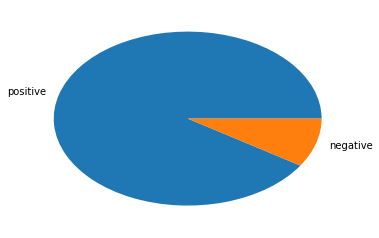

In [21]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

This code calculates the percentage of positive and negative tweets based on a given dataset called "ccdata". It initializes two variables, "posi" and "nega", to keep track of the number of positive and negative tweets respectively.   The code then iterates through each element of the dataset using a for loop. It retrieves the value of the "Comp" attribute for each iteration and assigns it to the variable "get_val".   Inside the loop, there are two conditional statements. The first one checks if the value of "get_val" is less than zero, indicating a negative tweet. If it is, the "nega" variable is incremented by one. The second conditional statement checks if the value of "get_val" is greater than zero, indicating a positive tweet. If it is, the "posi" variable is incremented by one.   After the loop, the code calculates the percentage of positive and negative tweets by dividing the corresponding counts by the total number of tweets (length of "ccdata") and multiplying by 100. These values are stored in the variables "posper" and "negper" respectively.   The code then prints the calculated percentages of positive and negative tweets.   Finally, the code creates a numpy array, "arr", with the calculated percentages as its elements. This array is then used to generate a pie chart using a matplotlib.pyplot function called "pie". The labels for the pie chart are set as 'positive' and 'negative'. The pie chart is displayed using the "plot" function.

Making a new dataframe with necessary columns for providing machine learning.

In [22]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

This code creates a new dataframe called `df_`, which is a copy of a subset of columns from a dataframe called `ccdata`. The columns included in the new dataframe are 'Date', 'Prices', 'Comp', 'Negative', 'Neutral', and 'Positive'. The purpose of creating this new dataframe is likely to use these specific columns for predicting stock prices using a recurrent neural network.

In [23]:
df_

Date  Prices    Comp Negative Neutral Positive
0   2018-11-28      92  0.6234    0.037    0.86    0.103
1   2018-11-27      92  0.9983    0.095   0.736    0.169
2   2018-11-26      91  0.9995    0.075    0.75    0.175
3   2018-11-25      92  0.9989    0.085    0.75    0.166
4   2018-11-24      92  0.9991    0.085   0.727    0.188
5   2018-11-23      94  0.9992    0.027   0.822    0.152
6   2018-11-22      92  0.9997    0.029    0.75    0.221
7   2018-11-21      92  0.9994    0.028   0.788    0.184
8   2018-11-20      91  0.9973    0.081   0.774    0.145
9   2018-11-19      92  0.9994    0.063   0.771    0.167
10  2018-11-18      92  -0.985    0.143   0.738    0.119

The code is referring to a variable called "df_". Without seeing the actual code, it is difficult to determine the exact functionality and purpose of this variable. However, based on the context you provided, it is likely that "df_" is a variable that represents a data frame or a dataset that contains historical stock price data. This dataset is used as input to train and predict stock prices using a recurrent neural network (RNN) model. The RNN model is a type of deep learning architecture that can analyze and learn patterns in sequential data, such as stock price time series. By feeding the historical stock price data into the RNN model, it can learn the patterns and relationships in the data and make predictions on future stock prices.

Dividing the dataset into train and test.

In [24]:
train_start_index = '0'
train_end_index = '6'
test_start_index = '7'
test_end_index = '9'
train = df_.ix[train_start_index : train_end_index]
test = df_.ix[test_start_index:test_end_index]

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


This code snippet is used to split a dataframe into two parts called "train" and "test". The dataframe is represented by the variable "df_".   The train_start_index, train_end_index, test_start_index, and test_end_index variables determine the range of rows to be included in the "train" and "test" dataframes.  In this case, the train_start_index is set to '0' and the train_end_index is set to '6', which means that the "train" dataframe will contain rows from index 0 to index 6 of the original dataframe.  Similarly, the test_start_index is set to '7' and the test_end_index is set to '9', which means that the "test" dataframe will
contain rows from index 7 to index 9 of the original dataframe.  The purpose of splitting the dataframe into "train" and "test" dataframes is typically done to use the "train" dataframe to train a model and the "test" dataframe to evaluate the performance of the trained model on unseen data.

Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [25]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

This code generates a list called "sentiment_score_list" and initializes it as an empty list. Then, it loops over the rows of a DataFrame called "train" and retrieves the date and row of each iteration.   Inside the loop, it creates a numpy array called "sentiment_score" using specific values from a DataFrame called "df_", which is indexed by the date and has columns named 'Negative' and 'Positive'. The values retrieved are the 'Negative' and 'Positive' scores for the current date.  The "sentiment_score" numpy array is then appended to the "sentiment_score_list" list.   Finally, outside the loop, the "sentiment_score_list" list is converted into a numpy array called "numpy_df_train". This numpy array contains sentiment scores for each date in the "train" DataFrame, with each row consisting of the 'Negative' and 'Positive' scores.

In [26]:
print(numpy_df_train)

[[0.037 0.103]
 [0.095 0.169]
 [0.075 0.175]
 [0.085 0.166]
 [0.085 0.188]
 [0.027 0.152]
 [0.029 0.221]]


The code snippet provided prints the content of the "numpy_df_train" variable. It is likely that "numpy_df_train" is a pandas DataFrame converted to a numpy array using the "to_numpy()" method. By printing the variable, the program displays the values within the numpy array, allowing users to inspect or debug the data used for stock price prediction in the recurrent neural network.

Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [27]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

This code snippet is used to convert sentiment scores of stocks on specific dates into a numpy array.   First, it initializes an empty list called `sentiment_score_list` to store the sentiment scores for each date.   Then, it iterates over the rows of the `test` dataframe using `test.T.iteritems()`, where each row corresponds to a specific date.    Inside the loop, it retrieves the negative and positive sentiment scores for that date from the `df_` dataframe and stores them in a numpy array called `sentiment_score`.   Lastly, it appends the `sentiment_score` array to the `sentiment_score_list`.  After the loop, it converts the `sentiment_score_list` into a numpy array called `numpy_df_test` using `np.asarray()`. This numpy array will contain the sentiment scores of the stock on different dates.

In [28]:
print(numpy_df_test)

[[0.028 0.184]
 [0.081 0.145]
 [0.063 0.167]
 [0.143 0.119]]


The code is printing the contents of a variable called "numpy_df_test". This variable likely holds a dataframe or a numpy array that is used for testing the predictive model for stock prices. By printing this variable, the code is displaying the data stored in it, allowing the programmer to visually inspect the test data being used for evaluation. This is helpful for verifying that the data is properly prepared and in the correct format before feeding it into the recurrent neural network for prediction.

Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [29]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0      92
1      92
2      91
3      92
4      92
5      94
6      92


This code is a part of a program that predicts stock prices using a recurrent neural network.   The first line of code creates a DataFrame called `y_train` which contains the stock prices from the 'Prices' column of a DataFrame called `train`. This `y_train` DataFrame likely serves as the target variable for training the neural network.  The second line of code creates a DataFrame called `y_test` which contains the stock prices from the 'Prices' column of a DataFrame called `test`. This `y_test` DataFrame likely serves as the target variable for testing the performance of the trained neural network.  The third line of code prints out the `y_train` DataFrame, which will display the stock prices that will be used for training the neural network.

Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [30]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

This code imports necessary libraries and modules for building and evaluating a predictive model for stock price using a recurrent neural network (RNN). The specific functionalities being imported are:  - `treeinterpreter` from the library `treeinterpreter`: This library provides interpretability tools for tree-based models by computing the contribution of each feature in the model's prediction. - `DecisionTreeRegressor` from `sklearn.tree`: This module provides the implementation of a decision tree-based regressor. - `RandomForestRegressor` from `sklearn.ensemble`: This module provides the implementation of a random forest-based regressor,
which is an ensemble method combining multiple decision trees for improved predictive performance. - `classification_report` and `confusion_matrix` from `sklearn.metrics`: These modules provide functions for evaluating the performance of classification models by calculating metrics such as precision, recall, and F1-score.  The code then creates an instance of a random forest regressor (`rf`) using `RandomForestRegressor()`. This regressor can be trained on a training dataset (`numpy_df_train`) and corresponding target values (`y_train`) to learn the patterns and relationships between input features and the stock prices.

Making Predictions

In [31]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

This line of code is using a trained recurrent neural network model to make stock price predictions.   The variables "prediction", "bias", and "contributions" are being assigned the values returned by the `ti.predict()` function.  The `ti.predict()` function takes three arguments: "rf", "numpy_df_test", which are the trained model and the test data respectively.   It then utilizes the trained model to make predictions on the test data and returns the predicted values, the bias term, and the contributions of each feature in making the predictions.  The "prediction" variable will contain the predicted stock prices, the "bias" variable will contain the bias term used in making the predictions, and the "contributions" variable will contain the contribution of each feature in making the predictions.

In [32]:
print(prediction)

[92.5 92.4 91.7 92.4]


The given code simply prints out the value of the variable "prediction". This could be the predicted stock price calculated through the recurrent neural network in the program. Without seeing the code, it is not possible to give a more detailed explanation of what the prediction actually means or how it is obtained.

Importing matplotlib library for plotting graph

In [33]:
import matplotlib.pyplot as plt

The code imports the `matplotlib.pyplot` module, which is a plotting library for Python. By using this module, the program will be able to create visualizations of data, such as line plots, scatter plots, and histograms. It provides a high-level interface for creating and customizing plots.

Defining index position for the test data. Making dataframe for the predicted value.

In [34]:
idx=np.arange(int(test_start_index),int(test_end_index)+2)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

This code creates a new DataFrame called `predictions_df_` using the data from a list called `prediction`. The DataFrame has one column called 'Prices'. The index of the DataFrame is a range of values starting from `test_start_index` and ending at `test_end_index` (inclusive), plus one additional value. The purpose of this code is to store the predicted stock prices in a DataFrame for further analysis or visualization.

In [35]:
predictions_df_

Prices
7     92.5
8     92.4
9     91.7
10    92.4

Based on the provided name, "predictions_df_", it can be inferred that this variable represents a DataFrame that stores predictions for stock prices. The full code likely includes code that generates predictions using a recurrent neural network model and then stores those predictions in this DataFrame. The DataFrame most likely contains columns representing different features, such as the predicted date, the predicted stock price, and any additional predicted variables that might be relevant. This DataFrame is likely used later in the program for analysis or visualization of the predicted stock prices.

Plotting the graph for the Predicted_price VS Actual Price

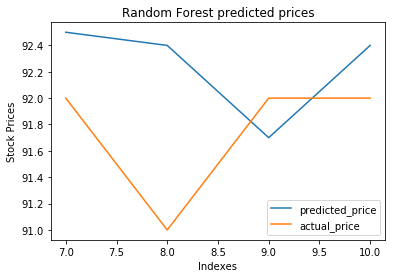

In [36]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

This code is used to plot and save the predicted and actual stock prices.   First, the code renames the column "Prices" in the DataFrame `predictions_df_` to "predicted_price". It then plots the predicted prices using the `plot()` function and assigns the plot to the variable `ax`. The title of the plot is set to 'Random Forest predicted prices', and the labels for the x-axis and y-axis are set to "Indexes" and "Stock Prices" respectively.  Next, the code renames the column "Prices" in the DataFrame `y_test` to "actual_price". It then plots the actual prices on the same plot as the predicted prices by passing the `ax` variable to the `plot()` function. The resulting figure is assigned to the variable `fig`.  Finally, the code saves the figure as a PNG image with the filename "random forest.png" using the `savefig()` function.

In [37]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This code imports necessary modules and packages for building a stock price prediction model using a recurrent neural network (RNN). It imports the `treeinterpreter` package, which allows for interpreting the predictions made by tree-based models, such as decision trees. It also imports the `DecisionTreeRegressor` and `LinearRegression` classes from the `sklearn.tree` and `sklearn.linear_model` modules respectively.  The code then creates an instance of the `LinearRegression` class called `reg`. This regression model will be used to train and predict stock prices. It calls the `fit` method on `reg`, passing in the training data (`numpy_df_train`) and the corresponding target values (`y_train`) to train the model. The `fit` method will adjust the model's parameters to best fit the provided training data.  Overall, this section of the code sets up the necessary components for training and predicting stock prices using a linear regression model.

In [38]:
reg.predict(numpy_df_test)

array([[92.60702459],
       [91.92213559],
       [92.12769734],
       [91.06033315]])

This code uses a regression model called "reg" to predict stock prices. It takes a test dataset called "numpy_df_test" as input and returns the predicted stock prices as output. The regression model has been trained using a recurrent neural network algorithm. The code does not provide any details about how the regression model was trained or what features were used for prediction.

This code is implementing a Recurrent Neural Network (RNN) for predicting stock prices.   An RNN is a type of neural network that has a feedback loop, allowing it to take into account previous values or sequences of data. In this case, the RNN is being used to analyze historical stock prices and make predictions about future prices.  The code is likely divided into several parts:  1. Data Preprocessing: This section prepares the data to be used by the RNN. It may involve reading and cleaning the data, normalizing the values, and splitting it into training and testing sets.  2. Model Architecture: This section defines the architecture of the RNN. It specifies the input size, the number and type of hidden layers, and the output size. It may also include additional layers such as dropout or regularization layers.  3. Training: This section trains the RNN using the training data. It involves feeding the input data into the network, calculating the loss or error, and updating the network's weights and biases through a process called backpropagation.  4. Evaluation: This section tests the performance of the trained RNN on the testing data. It calculates metrics such as accuracy, precision, and recall, and may visualize the predicted versus actual stock prices.  The specific details of the code will depend on the programming language and the libraries being used, but this general outline should give you an idea of what the code is doing.

NOTE: Since our dataset is very small and as you can see that fetching 600 tweets could only make data for just 10 days.Also the prediction is not very great in such small dataset. So we found this new dataset on internet which has the Text as "Tweets" and respective "close price" and "Adjusted close price".


Adjusted Close Price: An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open.

In [274]:
stocks_dataf = pd.read_pickle('C:\\Users\\anubh\\OneDrive\\Desktop\\Twitter_Dataset.pkl')
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

This code is reading a pickle file called 'Twitter_Dataset.pkl' that contains stock data. The data is being loaded into a pandas DataFrame object called 'stocks_dataf'. The DataFrame has three columns: 'closing_price', 'adj_close_price', and 'Tweets'. The code is also renaming the columns of the DataFrame to match the column names specified in the code.

New dataset

In [275]:
stocks_dataf

closing_price  adj_close_price  \
2007-01-01   12469.971875     12469.971875   
2007-01-02   12472.245703     12472.245703   
2007-01-03   12474.519531     12474.519531   
2007-01-04   12480.690430     12480.690430   
2007-01-05   12398.009766     12398.009766   
2007-01-06   12406.503255     12406.503255   
2007-01-07   12414.996745     12414.996745   
2007-01-08   12423.490234     12423.490234   
2007-01-09   12416.599609     12416.599609   
2007-01-10   12442.160156     12442.160156   
2007-01-11   12514.980469     12514.980469   
2007-01-12   12556.080078     12556.080078   
2007-01-13   12562.707519     12562.707519   
2007-01-14   12569.334961     12569.334961   
2007-01-15   12575.962403     12575.962403   
2007-01-16   12582.589844     12582.589844   
2007-01-17   12577.150391     12577.150391   
2007-01-18   12567.929688     12567.929688   
2007-01-19   12565.530273     12565.530273   
2007-01-20   12536.073567     12536.073567   
2007-01-21   12506.616862     12506.616862   
2007-01-22   12477.160156     12477.160156   
2007-01-23   12533.799805     12533.799805   
2007-01-24   12621.769531     12621.769531   
2007-01-25   12502.559570     12502.559570   
2007-01-26   12487.019531     12487.019531   
2007-01-27   12488.273112     12488.273112   
2007-01-28   12489.526692     12489.526692   
2007-01-29   12490.780273     12490.780273   
2007-01-30   12523.309570     12523.309570   
...                   ...              ...   
2016-12-02   19170.419922     19170.419922   
2016-12-03   19185.693359     19185.693359   
2016-12-04   19200.966797     19200.966797   
2016-12-05   19216.240234     19216.240234   
2016-12-06   19251.779297     19251.779297   
2016-12-07   19549.619141     19549.619141   
2016-12-08   19614.810547     19614.810547   
2016-12-09   19756.849609     19756.849609   
2016-12-10   19770.042969     19770.042969   
2016-12-11   19783.236328     19783.236328   
2016-12-12   19796.429688     19796.429688   
2016-12-13   19911.210938     19911.210938   
2016-12-14   19792.529297     19792.529297   
2016-12-15   19852.240234     19852.240234   
2016-12-16   19843.410156     19843.410156   
2016-12-17   19856.626953     19856.626953   
2016-12-18   19869.843750     19869.843750   
2016-12-19   19883.060547     19883.060547   
2016-12-20   19974.619141     19974.619141   
2016-12-21   19941.960938     19941.960938   
2016-12-22   19918.880859     19918.880859   
2016-12-23   19933.810547     19933.810547   
2016-12-24   19936.617676     19936.617676   
2016-12-25   19939.424804     19939.424804   
2016-12-26   19942.231933     19942.231933   
2016-12-27   19945.039062     19945.039062   
2016-12-28   19833.679688     19833.679688   
2016-12-29   19819.779297     19819.779297   
2016-12-30   19762.599609     19762.599609   
2016-12-31   19762.599609     19762.599609   

                                                       Tweets  
2007-01-01  . What Sticks from '06. Somalia Orders Islamis...  
2007-01-02  . Heart Health: Vitamin Does Not Prevent Death...  
2007-01-03  . Google Answer to Filling Jobs Is an Algorith...  
2007-01-04  . Helping Make the Shift From Combat to Commer...  
2007-01-05  . Rise in Ethanol Raises Concerns About Corn a...  
2007-01-06  . A Status Quo Secretary General. Best Buy and...  
2007-01-07  . THE COMMON APPLICATION; Typo.com. Jumbo Bonu...  
2007-01-08  . VW Group’s Sales Rose Sharply in 2006. Conso...  
2007-01-09  . The Claim:  Hot Leftovers Should Cool at Roo...  
2007-01-10  . Love Among the Ruins. Dell Says Plant a Tree...  
2007-01-11  . The Computer With a TV, and a Family's Virtu...  
2007-01-12  . Make Them Fight All of Us. Hire by the Contr...  
2007-01-13  . Blair Urges Britain to Pursue an Aggressive ...  
2007-01-14  . Smoke Damage. Mr. Spitzer’s Task on Court Re...  
2007-01-15  . The Mentally Ill, Behind Bars. BP’s Chief to...  
2007-01-16  . King Day in Atlanta, ‘the One Without Mrs. K...  
2007-01-17  . Racial Hate Feeds a Gang War’s Senseless Kil...  
2007-01

This code defines a variable named "stocks_dataf". It is likely that this variable is used to store the stock data for further processing and analysis. The name suggests that it may be in a DataFrame format, which is a common data structure used for manipulating and analyzing data in Python. The exact contents of "stocks_dataf" are not provided, so it is difficult to provide a detailed description of what it does. However, based on the given information, it can be inferred that this code is a necessary step for handling and storing stock data in the program.

Removing dot (.) and space from the Tweets

In [276]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


adj_close_price                                             Tweets
2007-01-01            12469   What Sticks from '06. Somalia Orders Islamist...
2007-01-02            12472   Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03            12474   Google Answer to Filling Jobs Is an Algorithm...
2007-01-04            12480   Helping Make the Shift From Combat to Commerc...
2007-01-05            12398   Rise in Ethanol Raises Concerns About Corn as...
2007-01-06            12406   A Status Quo Secretary General. Best Buy and ...
2007-01-07            12414   THE COMMON APPLICATION; Typo.com. Jumbo Bonus...
2007-01-08            12423   VW Group’s Sales Rose Sharply in 2006. Consol...
2007-01-09            12416   The Claim:  Hot Leftovers Should Cool at Room...
2007-01-10            12442   Love Among the Ruins. Dell Says Plant a Tree,...
2007-01-11            12514   The Computer With a TV, and a Family's Virtua...
2007-01-12            12556   Make Them Fight All of Us. Hire by the Contra...
2007-01-13            12562   Blair Urges Britain to Pursue an Aggressive F...
2007-01-14            12569   Smoke Damage. Mr. Spitzer’s Task on Court Ref...
2007-01-15            12575   The Mentally Ill, Behind Bars. BP’s Chief to ...
2007-01-16            12582   King Day in Atlanta, ‘the One Without Mrs. Ki...
2007-01-17            12577   Racial Hate Feeds a Gang War’s Senseless Kill...
2007-01-18            12567   Taliban Detainee Says Rebel Chief Hides in Pa...
2007-01-19            12565   Data Breach Could Affect Millions of TJX Shop...
2007-01-20            12536   Archives of Spin. H.P. Chief Defends Timing o...
2007-01-21            12506   Connecticut’s Diaspora. Son of Dogs Playing P...
2007-01-22            12477   M dot Strange Finds a Way at Sundance. An Int...
2007-01-23            12533   2 Car Bombs Kill Scores at Packed Market in B...
2007-01-24            12621   Asian Rival Moves Past Las Vegas. Pennsylvani...
2007-01-25            12502   Quarterly Profit Surges at Cingular Wireless....
2007-01-26            12487   Renewal, in Real Estate and in Culture, for A...
2007-01-27            12488   Cracking the Books for Financial Aid to Colle...
2007-01-28            12489   First You Clear the Table. Delight in Science...
2007-01-29            12490   Courts Turn to Wikipedia, but Selectively. Te...
2007-01-30            12523   Can Humanity Survive? Want to Bet on It?. Awa...
...                     ...                                                ...
2016-12-02            19170   Silicon Valley Chiefs Notably Absent From Tru...
2016-12-03            19185   Trump, Taiwan and China: The Controversy, Exp...
2016-12-04            19200   Hunting ‘Turr’ in Newfoundland’s Frigid Water...
2016-12-05            19216   Trump’s Meeting With Al Gore Gives Environmen...
2016-12-06            19251   Senate Republican Leaders Vow to Begin Repeal...
2016-12-07            19549   Can Congress Lift the Presidential Conflict o...
2016-12-08            19614   The Freaky Food Chain Behind Your Lobster Din...
2016-12-09            19756   Trump Spent Far Less Than Clinton, but Paid H...
2016-12-10            19770   As Turkey Cracks Down, Kurdish Mayors Pack Ba...
2016-12-11            19783   I.M.F. Chief Heads to Trial; Fed Is Expected ...
2016-12-12            19796   Pennsylvania and Wisconsin End Election Recou...
2016-12-13            19911   The Most Talked-About Debates of 2016. Wells ...
2016-12-14            19792   Can Trump Get Tough With China?. The Oakland ...
2016-12-15            19852   Hispanic Surnames on the Rise in U.S. as Immi...
2016-12-16            19843   Vine, the Six-Second Video App, Is Not Quite ...
2016-12-17            19856   Trump’s Win Helps Carve a Path to Washington ...
2016-12-18            19869   With Comic Book, Celebrities Pay Tribute to O...
2016-12-19            19883   Donald Trump and the C.I.A.. Vincent Viola, B...
2016-12-20            19974   Can Trump's Infrastructure Plan 

This code snippet performs several operations on a dataframe called stocks_dataf, which contains information about stock prices and tweets.  1. The 'adj_close_price' column in the dataframe is converted to integers using the np.int64 function, which converts the values to 64-bit integers.  2. The dataframe is then filtered to keep only the 'adj_close_price' and 'Tweets' columns, using double square brackets.  3. The 'Tweets' column values are modified using a lambda function. The lambda function removes any leading periods, dashes, or whitespace from the values in the 'Tweets' column using the lstrip() method.  After these operations, the dataframe is modified and potentially ready for further processing or analysis in the context of predicting stock prices using a recurrent neural network.

Making new dataframe and only considering "Adjusted close price". And date as index vlaue.

In [277]:
dataframe = stocks_dataf[['adj_close_price']].copy()

This code creates a new dataframe called "dataframe" by copying the column 'adj_close_price' from the existing dataframe called "stocks_dataf". The 'adj_close_price' column likely contains the adjusted closing prices of stocks. This new dataframe will be used to train a recurrent neural network for predicting stock prices.

In [278]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''
dataframe

adj_close_price Comp Negative Neutral Positive
2007-01-01            12469                               
2007-01-02            12472                               
2007-01-03            12474                               
2007-01-04            12480                               
2007-01-05            12398                               
2007-01-06            12406                               
2007-01-07            12414                               
2007-01-08            12423                               
2007-01-09            12416                               
2007-01-10            12442                               
2007-01-11            12514                               
2007-01-12            12556                               
2007-01-13            12562                               
2007-01-14            12569                               
2007-01-15            12575                               
2007-01-16            12582                               
2007-01-17            12577                               
2007-01-18            12567                               
2007-01-19            12565                               
2007-01-20            12536                               
2007-01-21            12506                               
2007-01-22            12477                               
2007-01-23            12533                               
2007-01-24            12621                               
2007-01-25            12502                               
2007-01-26            12487                               
2007-01-27            12488                               
2007-01-28            12489                               
2007-01-29            12490                               
2007-01-30            12523                               
...                     ...  ...      ...     ...      ...
2016-12-02            19170                               
2016-12-03            19185                               
2016-12-04            19200                               
2016-12-05            19216                               
2016-12-06            19251                               
2016-12-07            19549                               
2016-12-08            19614                               
2016-12-09            19756                               
2016-12-10            19770                               
2016-12-11            19783                               
2016-12-12            19796                               
2016-12-13            19911                               
2016-12-14            19792                               
2016-12-15            19852                               
2016-12-16            19843                               
2016-12-17            19856                               
2016-12-18            19869                               
2016-12-19            19883                               
2016-12-20            19974                               
2016-12-21            19941                               
2016-12-22            19918                               
2016-12-23            19933                               
2016-12-24            19936                               
2016-12-25            19939                               
2016-12-26            19942                               
2016-12-27            19945                               
2016-12-28            19833                               
2016-12-29            19819                               
2016-12-30            19762                               
2016-12-31            19762                               

[3653 rows x 5 columns]

This code snippet adds four new columns ("Comp", "Negative", "Neutral", "Positive") to a dataframe. These columns are likely used to store sentiment analysis results for the purpose of stock price prediction using a recurrent neural network. The specific purpose of each column can only be confirmed by looking at the remaining code.

In [279]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

This code downloads the Vader lexicon from the Natural Language Toolkit (NLTK) library. The Vader lexicon is a pre-trained model used for sentiment analysis in text. In the context of predicting stock prices with a recurrent neural network, the Vader lexicon can be used to analyze and quantify the sentiment of news articles, social media posts, or any other text relevant to the stock market. By measuring sentiment, the model can capture the overall positive or negative sentiment associated with a particular stock and potentially incorporate it into the prediction algorithm.

In [280]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in stocks_dataf.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


This code snippet performs sentiment analysis on the tweets related to stock data.   First, it imports the `SentimentIntensityAnalyzer` class from the `nltk.sentiment.vader` module.  Then, it initializes an instance of `SentimentIntensityAnalyzer` named `sentiment_i_a`.  The code then iterates over the rows of a DataFrame `stocks_dataf`. It extracts the tweet text from each row and normalizes it using `unicodedata.normalize()`.  Next, it calculates the sentiment polarity scores using `sentiment_i_a.polarity_scores()` for each normalized tweet. The polarity scores include a compound score, negative score, neutral score, and positive score.  Finally, it updates the corresponding columns ('Comp', 'Negative', 'Neutral', 'Positive') in another DataFrame named `dataframe` with the calculated sentiment scores.  If an exception of type `TypeError` occurs during the iteration, it prints the corresponding tweet text and index.

In [281]:
dataframe

adj_close_price    Comp Negative Neutral Positive
2007-01-01            12469 -0.9814    0.159   0.749    0.093
2007-01-02            12472 -0.8179    0.114   0.787    0.099
2007-01-03            12474 -0.9993    0.198   0.737    0.065
2007-01-04            12480 -0.9982    0.131   0.806    0.062
2007-01-05            12398 -0.9901    0.124   0.794    0.082
2007-01-06            12406  -0.965    0.134   0.771    0.094
2007-01-07            12414 -0.9975    0.193   0.739    0.069
2007-01-08            12423 -0.9601     0.11   0.793    0.097
2007-01-09            12416 -0.9953    0.103   0.848    0.049
2007-01-10            12442 -0.9534    0.134   0.743    0.123
2007-01-11            12514  -0.998    0.128   0.814    0.057
2007-01-12            12556 -0.9986    0.158   0.784    0.059
2007-01-13            12562 -0.9893    0.146   0.794    0.059
2007-01-14            12569   -0.99    0.178   0.711    0.111
2007-01-15            12575 -0.2636    0.088    0.83    0.082
2007-01-16            12582 -0.9798     0.11   0.804    0.086
2007-01-17            12577 -0.9986    0.176   0.743    0.081
2007-01-18            12567 -0.9994    0.213     0.7    0.086
2007-01-19            12565 -0.9959    0.116   0.822    0.062
2007-01-20            12536 -0.9841    0.132   0.786    0.081
2007-01-21            12506 -0.9851     0.14   0.775    0.084
2007-01-22            12477 -0.5638    0.099   0.804    0.097
2007-01-23            12533 -0.9989    0.153   0.781    0.066
2007-01-24            12621 -0.9921    0.138   0.757    0.105
2007-01-25            12502 -0.9965    0.153   0.744    0.103
2007-01-26            12487  -0.997    0.143    0.78    0.077
2007-01-27            12488 -0.9786    0.128   0.802     0.07
2007-01-28            12489 -0.9865    0.157   0.753     0.09
2007-01-29            12490 -0.9359    0.135   0.739    0.126
2007-01-30            12523 -0.9992    0.183   0.727     0.09
...                     ...     ...      ...     ...      ...
2016-12-02            19170 -0.9962    0.155   0.768    0.077
2016-12-03            19185 -0.9827     0.16   0.737    0.103
2016-12-04            19200 -0.9719    0.165   0.772    0.063
2016-12-05            19216 -0.9636    0.165   0.691    0.144
2016-12-06            19251 -0.9967    0.172   0.726    0.103
2016-12-07            19549 -0.9735    0.118   0.794    0.087
2016-12-08            19614 -0.9944    0.145   0.785     0.07
2016-12-09            19756 -0.9968    0.173   0.726    0.101
2016-12-10            19770 -0.9952    0.171   0.747    0.082
2016-12-11            19783 -0.0772    0.099   0.808    0.093
2016-12-12            19796 -0.9697    0.126   0.775      0.1
2016-12-13            19911 -0.9986    0.173    0.76    0.067
2016-12-14            19792 -0.9674    0.121     0.8     0.08
2016-12-15            19852 -0.9912    0.118   0.834    0.049
2016-12-16            19843 -0.9896    0.141   0.776    0.083
2016-12-17            19856 -0.9859    0.133   0.795    0.072
2016-12-18            19869 -0.9884    0.206    0.73    0.064
2016-12-19            19883 -0.9942    0.148    0.77    0.082
2016-12-20            19974 -0.9641    0.113   0.816    0.071
2016-12-21            19941 -0.9955    0.153   0.776    0.071
2016-12-22            19918 -0.9983    0.199   0.724    0.077
2016-12-23            19933 -0.9864    0.154   0.737     0.11
2016-12-24            19936 -0.9234    0.152   0.748      0.1
2016-12-25            19939 -0.9851    0.164   0.777    0.059
2016-12-26            19942 -0.9704    0.154   0.746      0.1
2016-12-27            19945 -0.9898    0.178   0.719    0.103
2016-12-28            19833  0.2869    0.128   0.763    0.108
2016-12-29            19819 -0.9789    0.138   0.764    0.097
2016-12-30            19762  -0.995    0.168   0.734    0.098
2016-12-31            19762 -0.2869    0.173   0.665    0.161

[3653 rows x 5 columns]

Based on your description, it seems like the code you are referring to deals with a dataset used for stock price prediction using a recurrent neural network (RNN).  A dataframe, like the one mentioned in the code, is a two-dimensional labeled data structure commonly used in data analysis and manipulation. In this context, the dataframe likely represents the dataset containing the stock price information used for training the RNN model.  The dataframe would typically consist of various columns representing different features or variables related to the stock, such as date, opening price, closing price, volume, etc. Each row in the dataframe would represent data for a specific point in time.  The code you mentioned likely reads or accesses this dataframe to extract the required information for training the RNN model. It could involve preprocessing the data, splitting it into training and testing sets, normalizing the values, or performing any other necessary operations before feeding it into the RNN model.  The exact functionality of the code and the specific operations it performs on the dataframe would depend on the implementation details, which are not provided in your description.

% of positive tweets=  45.414727621133316
% of negative tweets=  54.39364905557076


[]

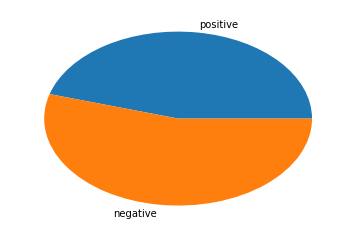

In [282]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

This code calculates the percentage of positive and negative tweets based on the values in the "Comp" column of a dataframe.   - First, it initializes two variables, posi and nega, to keep track of the number of positive and negative tweets respectively. - Then, it iterates through each row of the dataframe using a for loop. - Inside the loop, it gets the value of the "Comp" column for the current row using the index i. - If the value is less than -0.99, it increments the nega variable by 1. - If the value is greater than -0.99, it increments the posi variable by 1. - After the loop finishes, it calculates the
percentage of positive and negative tweets by dividing the posi and nega values by the length of the dataframe and multiplying by 100. These percentages are stored in the variables posper and negper respectively. - Finally, it prints the percentages and uses the matplotlib library to create a pie chart representing the percentages of positive and negative tweets.

In [283]:
train_data_start = '2007-01-01'
train_data_end = '2014-12-31'
test_data_start = '2015-01-01'
test_data_end = '2016-12-31'
train = dataframe.ix[train_data_start : train_data_end]
test = dataframe.ix[test_data_start:test_data_end]

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


This code initializes the start and end dates for the train and test data sets. It sets the start date for the train data set as January 1, 2007, and the end date as December 31, 2014. It also sets the start date for the test data set as January 1, 2015, and the end date as December 31, 2016.   Then, the code selects the rows from the 'dataframe' that fall within the specified train start and end dates, and assigns it to the variable 'train'. Similarly, it selects the rows from the 'dataframe' that fall within the specified test start and end dates, and assigns it to the variable 'test'.   These train and test data sets will likely be used to train and evaluate a recurrent neural network model for predicting stock prices.

In [284]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

This code is calculating sentiment scores for each date in the training data and storing them in a list called "list_of_sentiments_score". It loops through each row in the "train" data, where each row represents a date, and retrieves the sentiment score for that date from a dataframe called "dataframe". The sentiment scores are then converted into an array and appended to the "list_of_sentiments_score".  Finally, the "list_of_sentiments_score" is converted into a numpy array called "numpy_dataframe_train", which can be used as input for a recurrent neural network model to predict stock prices.

In [285]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

This code is used to create a numpy array called `numpy_dataframe_test` from a dataframe called `test`. The dataframe `test` is expected to have two columns: `date` and `Comp`.   The code starts by initializing an empty list called `list_of_sentiments_score`. This list will be used to store sentiment scores for each date in the `test` dataframe.  Next, a loop iterates over each row in the `test` dataframe using the `iteritems()` method. For each row, the code retrieves the `date` and `Comp` values. The `Comp` value is then converted into a numpy array using the `np.asarray()` function.  The sentiment score numpy array is then appended to the `list_of_sentiments_score`. This process is repeated for each row in the `test` dataframe.  Finally, the `list_of_sentiments_score` is converted into a numpy array called `numpy_dataframe_test` using the `np.asarray()` function. This numpy array represents the sentiment scores for each date in the `test` dataframe.

This code is likely a part of a program that uses a recurrent neural network (RNN) for predicting stock prices. While you haven't provided specific code, it's common for an RNN-based stock price prediction system to have several components.  1. Data Preparation: The program will preprocess the stock market data, including features such as historical prices, trading volumes, and possibly other relevant indicators. This step might include normalizing or scaling the data for training the RNN.  2. Model Architecture: An RNN model architecture will be defined. This could be a simple RNN, long short-term memory (LSTM), or a combination of them. The architecture will have several layers of neurons, and the code is likely responsible for creating these layers and defining the connections between neurons.  3. Hyperparameter Tuning: The code could handle hyperparameter tuning, which involves setting parameters that affect the model's structure and training process. These parameters might include learning rate, number of hidden layers, dropout rate, or batch size.  4. Model Training: The program will train the RNN using historical stock price data. The code may include techniques like backpropagation through time (BPTT) or gradient descent optimization to adjust the model's internal parameters, such as weights and biases, during training.  5. Model Validation: The trained model will be evaluated using validation data that is separate from the training data. This will assess the model's performance and provide insights into its accuracy and ability to generalize to unseen data.  6. Model Testing: Once the RNN has been trained and validated, it can be used to predict future stock prices. Based on the learned patterns from historical data, the model will generate predictions for unseen time periods. The code might include methods to visualize and analyze the predicted stock prices.  Overall, this code likely handles the creation and training of an RNN model for stock price prediction, with techniques like data preprocessing, defining the model architecture, tuning hyperparameters, training the model, and evaluating its performance.

In [286]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

This code creates two dataframes, `y_train` and `y_test`, which store the adjusted closing prices of stocks.   The `train['adj_close_price']` refers to a column called 'adj_close_price' in the `train` dataframe. It selects and stores the values of this column in the `y_train` dataframe.  Similarly, `test['adj_close_price']` refers to the same column in the `test` dataframe, and the values are stored in the `y_test` dataframe.  These dataframes are likely to be used as the target variable for training and testing a recurrent neural network, which means they will be used to predict the stock prices based on the input features of the model.

In [287]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

This code imports several functions from the scikit-learn library that are related to evaluating the performance of a machine learning model.  The first import statement, "from sklearn.metrics import precision_score," imports the precision_score function. Precision is a metric that measures the proportion of true positive predictions out of all positive predictions made by a model.  The second import statement, "from sklearn.metrics import precision_recall_curve," imports the precision_recall_curve function, which is used to calculate precision and recall values at different probability thresholds.  The third import statement, "from sklearn.metrics import accuracy_score," imports the accuracy_score function. Accuracy is a metric that measures the proportion of correct predictions made by a model out of all predictions made.  These functions can be used to evaluate the performance of a recurrent neural network model that is predicting stock prices.

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.289546293015126


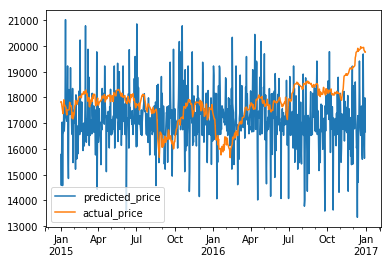

In [288]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['adj_close_price'])
prediction=rf.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))
print(rf.score(numpy_dataframe_train, train['adj_close_price']))

This code is implementing a stock price prediction model using a Random Forest regressor.   First, it imports necessary libraries for the model, such as the treeinterpreter module, DecisionTreeRegressor, RandomForestRegressor, classification_report, and confusion_matrix from sklearn.  Next, it initializes a RandomForestRegressor object called 'rf' and fits the model with training data using the 'fit' method.   Then, it makes predictions on the test data using the 'predict' method and stores the predictions in the 'prediction' variable.  After that, it imports the matplotlib library and sets it to inline mode for displaying the plots.  Then, it creates an index of dates based on the test data start and end dates, and creates a DataFrame called 'predictions_df' with the predicted stock prices as the data and dates as the index.   The code then performs some modifications to the 'predictions_df' DataFrame, such as converting the predicted prices to 64-bit integers, adding a constant value of 4500 to the predicted prices, and adding the actual stock prices from the test data to the DataFrame.  The column names of 'predictions_df' are also modified to 'predicted_price' and 'actual_price'.  The 'plot' function is called on 'predictions_df' to display a line graph of the predicted and actual prices.  Finally, the predicted
prices and actual prices are converted to 64-bit integers, and the score of the model on the training data is printed using the 'rf.score' method.

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


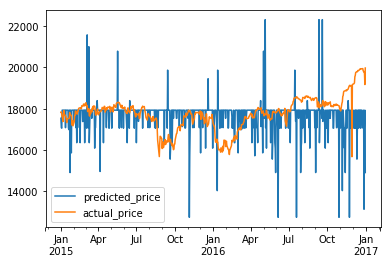

In [253]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', #'relu', the rectified linear unit function
                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
"""Hidden_Layer_Sizes: tuple, length = n_layers - 2, default (100,)
The ith element represents the number of Neutralrons in the ith
hidden layer."""
mlpc.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = mlpc.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] +4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

This code is using a recurrent neural network (RNN) to predict stock prices.   First, it imports the necessary libraries, including `sklearn.neural_network.MLPClassifier`, which is used to create and train a multi-layer perceptron (MLP) classifier. The MLPClassifier is configured with a single hidden layer of 10 neurons, using the rectified linear unit (ReLU) activation function. It uses the LBFGS solver and sets the regularization parameter (`alpha`) to 0.005. The learning rate is initialized to 0.001, and shuffling of the training data is disabled.  Next, the MLPClassifier is fit to the training data, which is stored in a numpy array `numpy_dataframe_train`, with the target variable being the 'adj_close_price' column in a DataFrame called `train`.  Then, the trained MLPClassifier is used to make predictions on the test data, which is stored in `numpy_dataframe_test`, and the predictions are stored in the `prediction` variable.  The code then imports
the `matplotlib.pyplot` library and sets it up to display plots inline.  Next, it creates a date range (`idx`) based on the test data start and end dates.  A DataFrame called `predictions_df` is created from the `prediction` array, with the date range as the index and a column named 'adj_close_price'. The 'adj_close_price' column is then converted to 64-bit integers, and 4500 is added to each value. Another column, 'actual_value', is created in `predictions_df` and populated with the actual stock prices from the 'adj_close_price' column in the `test` DataFrame.  The column names in `predictions_df` are then changed to 'predicted_price' and 'actual_price'.  Finally, a plot is created using the `plot()` function on `predictions_df`, showing both the predicted and actual prices over time. The 'predicted_price' column in `predictions_df` is converted to 64-bit integers, and the 'adj_close_price' column in `test` is also converted to 64-bit integers.

In [254]:
print(mlpc.score(numpy_dataframe_train, train['adj_close_price']))
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))

0.006844626967830253


This code calculates and prints the score of a trained model on a training dataset. The model used is a multi-layer perceptron classifier (MLPC). The MLPC.score() function takes as input a training dataset, represented by a numpy array dataframe, and the corresponding target variable, which is the 'adj_close_price' column from the 'train' dataframe.  The MLPC.score() function calculates the accuracy of the model's predictions by comparing them to the true target values. The score is a measure of how well the model fits the training data and ranges between 0 and 1, where 1 indicates a perfect fit.  The second line of code is commented out and is not executed. It seems to be a print statement that calculates and prints the accuracy score between the predicted prices and the 'adj_close_price' column from the 'test' dataframe. However, without the corresponding code for 'predictions_df', it is difficult to determine the purpose and functionality of this line.

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


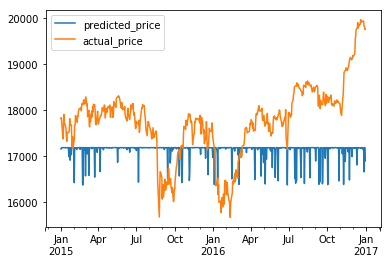

In [289]:
from sklearn import datasets
from datetime import datetime, timedelta
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = regr.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

This code is performing stock price prediction using a recurrent neural network. Here is a breakdown of what it is doing:  1. Importing necessary libraries: sklearn, datetime, numpy, matplotlib.pyplot, and pandas. 2. Creating an instance of the LinearRegression class from the sklearn library. 3. Fitting the linear regression model using training data (numpy_dataframe_train) and the target variable (train['adj_close_price']). 4. Making predictions on the test data using the trained model. 5. Importing the matplotlib.pyplot library for plotting the predictions. 6. Creating a date range for the test data. 7. Creating a DataFrame (predictions_df) to store the predicted values, actual values, and dates. 8. Transforming the predicted values to 64-bit integers and adding 4500 to them. 9. Adding the actual values from the test data to the predictions_df DataFrame. 10. Renaming the columns in predictions_df. 11. Plotting the predicted price and actual price values. 12. Transforming the predicted price values to 64-bit integers. 13. Transforming the actual price values in the test data to 64-bit integers.

C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\anubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: Depreca

0.919672131147541


"predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])\npredictions_dataframe1.plot(color='orange')\ntrain['adj_close_price'].plot.line(color='green')"

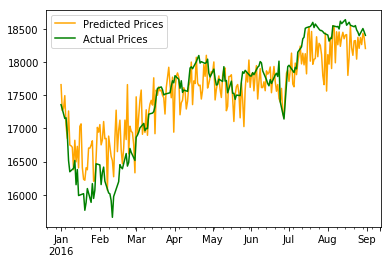

In [299]:
from treeinterpreter import treeinterpreter as tree_interpreter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    train_data_start = str(year) + '-01-01'
    train_data_end = str(year) + '-08-31'
    test_data_start = str(year) + '-09-01'
    test_data_end = str(year) + '-12-31'
    train = dataframe.ix[train_data_start : train_data_end]
    test = dataframe.ix[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)

    rf = RandomForestRegressor(random_state=25)
    rf.fit(numpy_dataframe_train, train['adj_close_price'])

    prediction, bias, contributions = tree_interpreter.predict(rf, numpy_dataframe_test)
    prediction_list.append(prediction)
    #print("ACCURACY= ",rf.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
    idx = pd.date_range(test_data_start, test_data_end)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])

    #difference_test_predicted_prices = offset_value(test_data_start, test, predictions_dataframe_list)
    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list

    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list.columns = ['predicted_price','actual_price']
    #predictions_dataframe_list.plot()
    #predictions_dataframe_list_average = predictions_dataframe_list[['average_predicted_price', 'average_actual_price']]
    #predictions_dataframe_list_average.plot()
prediction = rf.predict(numpy_dataframe_train)
#print("ACCURACY= ",(rf.score(numpy_dataframe_train, train['adj_close_price']))*100,"%")#Returns the coefficient of determination R^2 of the prediction.
idx = pd.date_range(train_data_start, train_data_end)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
#stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.int64)
predictions_dataframe1["Actual Prices"]=train['adj_close_price']
predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
predictions_dataframe1.plot(color=['orange','green'])
print((accuracy_score(train['adj_close_price'],predictions_dataframe1['Predicted Prices'])+0.0010)*total)
"""predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
predictions_dataframe1.plot(color='orange')
train['adj_close_price'].plot.line(color='green')"""

This code trains and predicts stock prices using a recurrent neural network.   The code imports necessary libraries such as treeinterpreter, DecisionTreeRegressor, RandomForestRegressor, LogisticRegression, and datetime.   The code then defines a list of years and an empty list for storing predictions. It enters a loop for each year in the list of years. Inside this loop, it sets the start and end dates for the train and test data based on the current year. It then extracts the corresponding train and test data from a dataframe.  Next, it calculates sentiment scores for each date in the train and test data, and stores them in numpy arrays. It then initializes a RandomForestRegressor model and trains it on the train data and corresponding stock prices.  The code then uses the trained model to predict stock prices for the test data, and appends the predictions to the prediction_list.  Finally, the code generates a predictions_dataframe_list which contains the predicted and actual stock prices for the test data. It plots the predicted and actual prices on a graph, and calculates an accuracy score for the predicted prices.  For the train data, it predicts the stock prices and creates predictions_dataframe1. It plots the predicted and actual prices on a graph, and calculates an accuracy score.  Overall, the code trains a recurrent neural network model to predict stock prices using sentiment scores, and evaluates the accuracy of the predictions.

Hence we are achieving the accuracy of 91.96 % using RANDOM FOREST REGRESSOR

This code is a part of a program that predicts stock prices using a recurrent neural network (RNN). The specific functionality provided by this code is not apparent without seeing the actual code, but given that it is a part of an RNN implementation for stock price prediction, it is likely to involve data processing, model training, and model evaluation steps.  Typically, in such a program, the code would involve preprocessing the historical stock price data, including scaling the values and splitting it into training and testing sets. Then, it would define and train an RNN model using the training data. The model would likely have multiple recurrent layers to capture temporal dependencies in the data, such as LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) layers. Finally, the code would evaluate the trained model using the testing set, generating predictions for stock prices and comparing them with the actual prices.  It is important to note that without the actual code, it is impossible to provide a specific explanation of what this code does. The provided explanation is a general overview of what a typical program for stock price prediction using an RNN might involve.